In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from cv2 import resize


In [31]:
check = np.load("../data/images/images_test.npy")[:23]
check_labels = np.load("../data/images/labels_test.npy")[:23]
check_label_ids = np.load("../data/images/label_ids_test.npy")[:23]
print(check_labels)
print(check_label_ids)

['hairline' 'hairline' 'hairline' 'hairline' 'hairline' 'hairline'
 'hairline' 'hairline' 'hairline' 'hairline' 'spiral' 'spiral' 'spiral'
 'spiral' 'spiral' 'spiral' 'spiral' 'spiral' 'spiral' 'spiral' 'spiral'
 'spiral' 'greenstick']
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2]


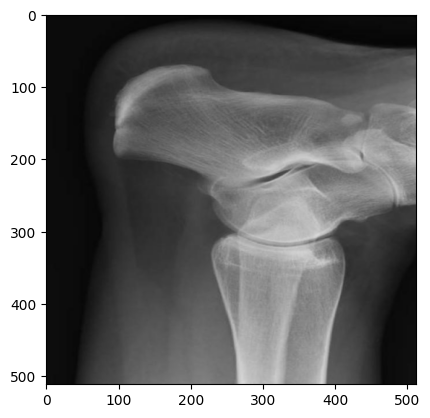

In [20]:
truth = cv2.imread("/home/davidsolow/projects/fracture-classification/data/raw/Hairline Fracture/Test/0-_jumbo_jpeg.rf.d39588df830d194c0cda3b800664160b.jpg")
def resize_image(image, target_size):
    """Resize an image while maintaining its aspect ratio."""
    (h, w) = image.shape[:2]
    (target_w, target_h) = target_size
    aspect_ratio = w / h
    target_aspect_ratio = target_w / target_h
    if aspect_ratio > target_aspect_ratio:
        new_w = target_w
        new_h = int(target_w / aspect_ratio)
    else:
        new_h = target_h
        new_w = int(target_h * aspect_ratio)
    resized_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
    blank_image = np.zeros((target_h, target_w, 3), dtype=np.uint8)
    x_offset = (target_w - new_w) // 2
    y_offset = (target_h - new_h) // 2
    blank_image[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized_image

    return blank_image

truth = resize_image(truth, (512, 512))

plt.imshow(truth, cmap='gray')
